# Welcome to Machine Learning.

# "ISBE"  The Motto and Main Steps when building a Machine Learning Model. 
## 1. I - Inspect and explore data.
## 2. S - Select and engineer features.
## 3. B - Build and train model.
## 4. E - Evaluate model.

In [ ]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score

In [2]:
df = pd.read_csv('data/akc-data.csv')
df.head()

,breed,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly


[Dog breed dataset](https://github.com/tmfilho/akcdata) data dictionary:
|  #  | column | description | example |
| --- | ------ | ----------- | ------- |
|  1  | description | 1 to 3 paragraphs describing the breed | "Akitas are burly, heavy-boned spitz-type dogs of imposing stature..." |
|  2  | temperament | breed temperament described in keywords | "Confident, Famously Funny, Fearless" |
|  3  | popularity  | popularity ranking (1-195) | 13 |
|  4  | min_height  | minimum height in cm | 60.96 |
|  5  | max_height  | maximum height in cm | 71.12 |
|  6  | min_weight  | minimum weight in kg | 3.18 |
|  7  | max_weight  | maximum weight in kg | 4.54 |
|  8  | min_expectancy  | minimum life expectancy in years | 10 |
|  9  | max_expectancy  | maximum life expectancy in years | 12 |
|  10  | group  | one of 9 breed groups assigned by the akc (7 main groups and 2 extra) | "Herding Group" |
|  11  | grooming_frequency_value  | A number representing the level of required grooming | 0.4 |
|  12  | grooming_frequency_category  | A categorization of grooming requirements | "Weekly Brushing" |
|  13  | shedding_value  | A number representing the level of shedding | 0.6 |
|  14  | shedding_category  | A categorization of shedding frequency | "Seasonal" |
|  15  | energy_level_value  | A number representing the breed's energy level | 0.8 |
|  16  | energy_level_category  | A categorization of energy level | "Energetic" |
|  17  | trainability_value  | A number representing the breed's trainability | 1.0 |
|  18  | trainability_category  | A categorization of trainability | "Eager to Please" |
|  19  | demeanor_value  | A number representing the breed's reaction to strangers and other pets | 0.6 |
|  20  | demeanor_category  | A categorization of reaction to strangers and other pets | "Alert/Responsive" |

In [3]:
# Shape and basic info
print(f"Shape: {df.shape}")
df.info()


Shape: (277, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   breed                        277 non-null    object 
 1   description                  277 non-null    object 
 2   temperament                  276 non-null    object 
 3   popularity                   198 non-null    object 
 4   min_height                   277 non-null    float64
 5   max_height                   277 non-null    float64
 6   min_weight                   275 non-null    float64
 7   max_weight                   275 non-null    float64
 8   min_expectancy               274 non-null    float64
 9   max_expectancy               274 non-null    float64
 10  group                        277 non-null    object 
 11  grooming_frequency_value     270 non-null    float64
 12  grooming_frequency_category  270 non-null    object 
 13  she

In [4]:
# Describe
df.describe()


,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
count,277.000000,277.000000,275.000000,275.000000,274.000000,274.000000,270.000000,257.000000,271.000000,253.000000,252.000000
mean,44.225801,52.720588,17.888858,27.291416,11.306569,13.832117,0.425926,0.529183,0.712915,0.624506,0.620635
std,14.238298,15.885454,12.290600,19.061416,1.817949,2.016668,0.198306,0.189068,0.168927,0.247271,0.201713
min,12.700000,17.780000,0.000000,0.000000,0.000000,0.000000,0.200000,0.200000,0.200000,0.200000,0.200000
25%,33.020000,38.100000,8.164663,12.927383,10.000000,13.000000,0.200000,0.400000,0.600000,0.400000,0.400000
50%,45.085000,53.340000,15.875733,24.947580,12.000000,14.000000,0.400000,0.600000,0.600000,0.600000,0.600000
75%,55.880000,66.040000,22.679619,34.019428,12.000000,15.000000,0.600000,0.600000,0.800000,0.800000,0.800000
max,76.200000,88.900000,68.038855,108.862169,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for nulls
df.isnull().sum()


breed                           0
description                     0
temperament                     1
popularity                     79
min_height                      0
max_height                      0
min_weight                      2
max_weight                      2
min_expectancy                  3
max_expectancy                  3
group                           0
grooming_frequency_value        7
grooming_frequency_category     7
shedding_value                 20
shedding_category              20
energy_level_value              6
energy_level_category           6
trainability_value             24
trainability_category          24
demeanor_value                 25
demeanor_category              25
dtype: int64

In [6]:
# Check for dupes
df.duplicated().sum()


0

In [14]:
# Drop rows with nulls in the specified columns
df = df.dropna(subset=[
    'min_height', 'max_height', 'min_weight', 'max_weight',
    'min_expectancy', 'max_expectancy',
    'grooming_frequency_value',
    'energy_level_value'
])
print(f"Shape: {df.shape}")

Shape: (264, 21)


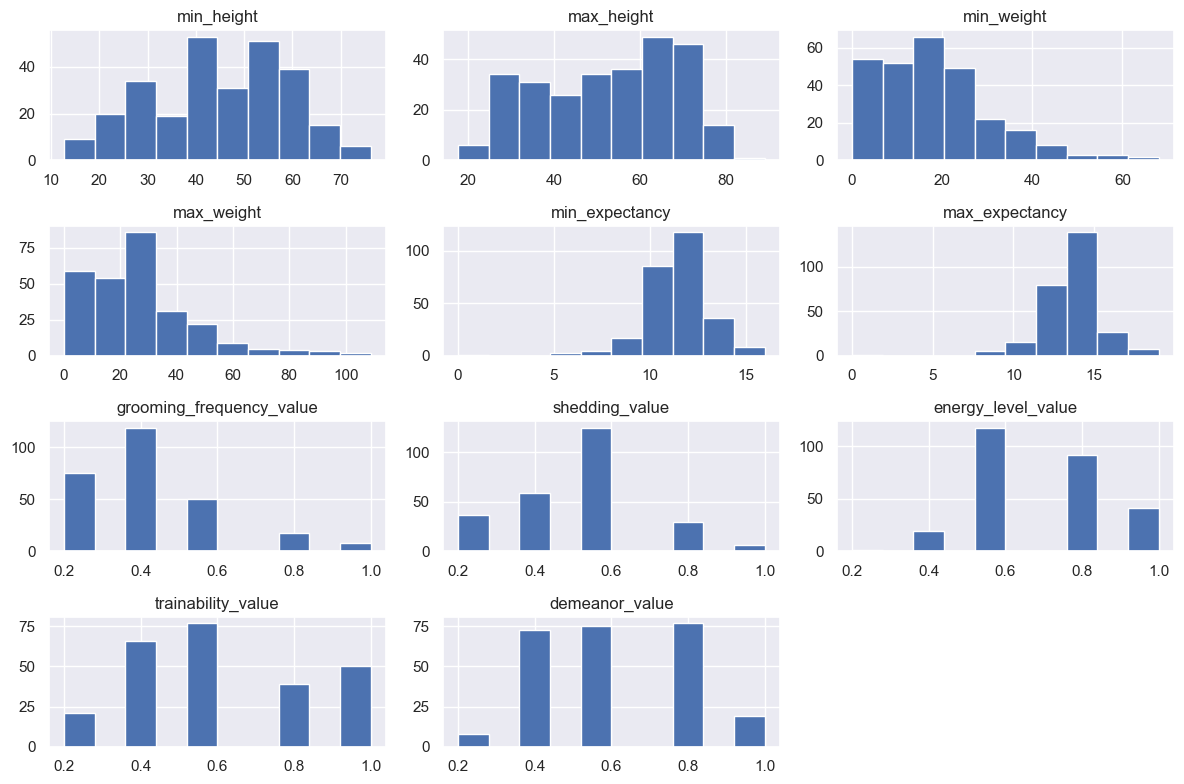

In [7]:
# Plot
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


# What i was thinking (with the help of GPT):
1. Predict if a dog is “Large” vs “Small”

**Target**: Create a new target variable: `is_large = 1` if `max_weight > 25kg`, else `0`.

**Why**? Everyone instantly understands the concept of "big dog vs small dog."

- Use features like height, weight, and energy level to predict size.
- This is a great opportunity to explain the sigmoid curve conceptually (e.g., the probability of being large increases as weight increases).
- The output probabilities are intuitive (e.g., "This breed has a 92% chance of being large.").

2. Predict if a dog is “High Energy” or “Low Energy”

**Target**: `is_high_energy = 1` if `energy_level_value >= 0.7`.

**Why**: Students feel this one — “Could I take this dog on a run?”

- Features: weight, height, trainability, demeanor.
- Fun twist: You can visualize feature coefficients and discuss tradeoffs (e.g., small dogs tend to have higher energy).

the rest below is purely GPT generated and needs sanity checking....

In [16]:
features = ['min_height', 'max_height', 'min_weight', 'max_weight',
            'min_expectancy', 'max_expectancy',
            'grooming_frequency_value',
            'energy_level_value', ]
X = df[features]
y = (df['max_weight'] > 25).astype(int)  # Example binary target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9433962264150944
[[25  2]
 [ 1 25]]


In [ ]:
coeffs = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
coeffs.head()

,Feature,Coefficient
3,max_weight,3.626045
2,min_weight,1.773053
1,max_height,0.504317
0,min_height,0.501641
7,energy_level_value,0.267050
